Распознавание картинок из датасета CIFAR-10

Датасет CIFAR-10 состоит из цветных картинок 32x32, разделенных на 10 классов: 

__airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__

In [ ]:
!pip install -q tensorflow==2.1

     |████████████████████████████████| 421.8MB 18kB/s 
     |████████████████████████████████| 450kB 39.8MB/s 
     |████████████████████████████████| 3.9MB 39.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=298e247cf4a041f94631386786295da9cfedc03d5c92cc6a3b3a2c16fc22fd03
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [5]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [6]:
print("Трейн:", x_train.shape, y_train.shape)
print("Тест:", x_test.shape, y_test.shape)

Трейн: (50000, 32, 32, 3) (50000, 1)
Тест: (10000, 32, 32, 3) (10000, 1)


In [7]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

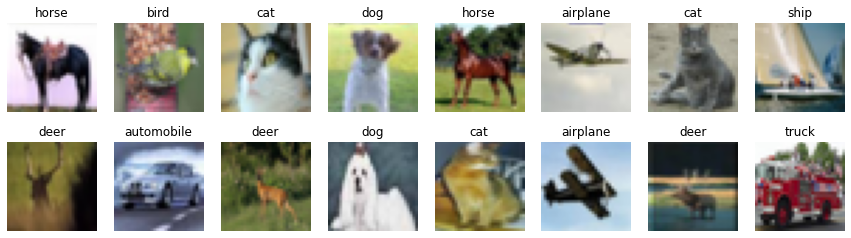

In [8]:
# посмотрим на примеры картинок
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [11]:
# нормализуем входы
x_train2 = x_train.astype('float32') / 255 - 0.5
x_test2 = x_test.astype('float32') / 255 - 0.5

# конвертируем метки в np.array (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Задаем *дефолтную* архитектуру сети

In [12]:
# слои, которые нам пригодятся
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [13]:
def make_default_model():
    model = Sequential()
    model.add(L.Conv2D(16, kernel_size=3, activation='relu', strides=1, padding='same', input_shape=(32, 32, 3)))
    model.add(L.Conv2D(32, kernel_size=3, activation='relu', strides=1, padding='same'))
    model.add(L.MaxPool2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(L.Conv2D(32, kernel_size=3, activation='relu', strides=1, padding='same'))
    model.add(L.Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='same'))
    model.add(L.MaxPool2D(pool_size=2))
    model.add(L.Dropout(0.25))
    model.add(L.Flatten())
    model.add(L.Dense(256, activation='relu'))
    model.add(L.Dropout(0.5))
    model.add(L.Dense(10, activation='softmax'))

    return model

In [14]:
K.clear_session()
model = make_default_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

# Тренируем модель

In [15]:
def train_model(make_model_func=make_default_model, optimizer="adam"):
  BATCH_SIZE = 32
  EPOCHS = 10

  K.clear_session()
  model = make_model_func()

  model.compile(
      loss='categorical_crossentropy',
      optimizer=optimizer,
      metrics=['accuracy']
  )

  model.fit(
      x_train2, y_train2,  # нормализованные данные
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=(x_test2, y_test2),
      shuffle=False
  )
  
  return model

In [23]:
# учим дефолтную архитектуру
def_model = train_model()



Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5066 - accuracy: 0.4501 - val_loss: 1.0944 - val_accuracy: 0.6078
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1064 - accuracy: 0.6053 - val_loss: 0.8812 - val_accuracy: 0.6909
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9463 - accuracy: 0.6659 - val_loss: 0.8194 - val_accuracy: 0.7102
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8566 - accuracy: 0.6984 - val_loss: 0.8041 - val_accuracy: 0.7214
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7972 - accuracy: 0.7177 - val_loss: 0.7829 - val_accuracy: 0.7280
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7488 - accuracy: 0.7355 - val_loss: 0.7299 - val_accuracy: 0.7462
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7039 - accuracy: 0.7525 - val_loss: 0.7017 - val_accuracy:

In [29]:

from sklearn.metrics import accuracy_score
predicts = def_model.predict_classes(x_test2)
predicts = keras.utils.to_categorical(predicts, NUM_CLASSES)
print('Test Accuracy: ', accuracy_score(y_test2, predicts))

Test Accuracy:  0.7669


In [30]:
def make_sigmoid_model():
    model = Sequential()
    model.add(L.Conv2D(16, kernel_size=3, activation='sigmoid', strides=1, padding='same', input_shape=(32, 32, 3)))
    model.add(L.Conv2D(32, kernel_size=3, activation='sigmoid', strides=1, padding='same'))
    model.add(L.MaxPool2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(L.Conv2D(32, kernel_size=3, activation='sigmoid', strides=1, padding='same'))
    model.add(L.Conv2D(64, kernel_size=3, activation='sigmoid', strides=1, padding='same'))
    model.add(L.MaxPool2D(pool_size=2))
    model.add(L.Dropout(0.25))
    model.add(L.Flatten())
    model.add(L.Dense(256, activation='sigmoid'))
    model.add(L.Dropout(0.5))
    model.add(L.Dense(10, activation='softmax'))

    return model

In [31]:
# учим sigmoid
sigmoid_model = train_model(make_sigmoid_model)
predicts = sigmoid_model.predict_classes(x_test2)
predicts = keras.utils.to_categorical(predicts, NUM_CLASSES)
print('Test Accuracy sigmoid: ', accuracy_score(y_test2, predicts))

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3181 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0962 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3038 - accuracy: 0.0974 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3033 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3032 - accuracy: 0.0968 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3032 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy:

In [33]:
# учим sgd
sgd_model = train_model(optimizer="sgd")
predicts = sgd_model.predict_classes(x_test2)
predicts = keras.utils.to_categorical(predicts, NUM_CLASSES)
print('Test Accuracy sgd: ', accuracy_score(y_test2, predicts))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0318 - accuracy: 0.2517 - val_loss: 1.7232 - val_accuracy: 0.3908
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6870 - accuracy: 0.3856 - val_loss: 1.4875 - val_accuracy: 0.4576
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5169 - accuracy: 0.4503 - val_loss: 1.3744 - val_accuracy: 0.4990
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4023 - accuracy: 0.4944 - val_loss: 1.2754 - val_accuracy: 0.5409
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3125 - accuracy: 0.5326 - val_loss: 1.1735 - val_accuracy: 0.5848
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2458 - accuracy: 0.5560 - val_loss: 1.1151 - val_accuracy: 0.6056
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1849 - accuracy: 0.5774 - val_loss: 1.0552 - val_accuracy:

In [35]:
def make_bn_model():
    model = Sequential()
    model.add(L.Conv2D(16, kernel_size=3, activation='relu', strides=1, padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(L.Conv2D(32, kernel_size=3, activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(L.MaxPool2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(L.Conv2D(32, kernel_size=3, activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(L.Conv2D(64, kernel_size=3, activation='relu', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(L.MaxPool2D(pool_size=2))
    model.add(L.Dropout(0.25))
    model.add(L.Flatten())
    model.add(L.Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(L.Dropout(0.5))
    model.add(L.Dense(10, activation='softmax'))

    return model

In [36]:
# учим bn
bn_model = train_model(make_bn_model)
predicts = bn_model.predict_classes(x_test2)
predicts = keras.utils.to_categorical(predicts, NUM_CLASSES)
print('Test Accuracy bn: ', accuracy_score(y_test2, predicts))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4283 - accuracy: 0.5097 - val_loss: 1.0431 - val_accuracy: 0.6316
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0000 - accuracy: 0.6492 - val_loss: 0.8232 - val_accuracy: 0.7131
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8805 - accuracy: 0.6913 - val_loss: 0.7815 - val_accuracy: 0.7261
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7970 - accuracy: 0.7218 - val_loss: 0.6992 - val_accuracy: 0.7560
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7369 - accuracy: 0.7410 - val_loss: 0.6741 - val_accuracy: 0.7685
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6778 - accuracy: 0.7634 - val_loss: 0.6522 - val_accuracy: 0.7715
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6308 - accuracy: 0.7785 - val_loss: 0.6558 - val_accuracy:

In [38]:
def make_sigmoid_bn_model():
    model = Sequential()
    model.add(L.Conv2D(16, kernel_size=3, activation='sigmoid', strides=1, padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(L.Conv2D(32, kernel_size=3, activation='sigmoid', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(L.MaxPool2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(L.Conv2D(32, kernel_size=3, activation='sigmoid', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(L.Conv2D(64, kernel_size=3, activation='sigmoid', strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(L.MaxPool2D(pool_size=2))
    model.add(L.Dropout(0.25))
    model.add(L.Flatten())
    model.add(L.Dense(256, activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(L.Dropout(0.5))
    model.add(L.Dense(10, activation='softmax'))

    return model

In [39]:
# учим sigmoid + bn
sigmoid_bn_model = train_model(make_sigmoid_bn_model)
predicts = sigmoid_bn_model.predict_classes(x_test2)
predicts = keras.utils.to_categorical(predicts, NUM_CLASSES)
print('Test Accuracy sigmoid_bn: ', accuracy_score(y_test2, predicts))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5855 - accuracy: 0.4369 - val_loss: 1.2918 - val_accuracy: 0.5365
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2125 - accuracy: 0.5697 - val_loss: 1.0344 - val_accuracy: 0.6322
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0687 - accuracy: 0.6252 - val_loss: 0.9062 - val_accuracy: 0.6848
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9807 - accuracy: 0.6574 - val_loss: 0.8645 - val_accuracy: 0.6959
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9256 - accuracy: 0.6766 - val_loss: 0.8283 - val_accuracy: 0.7135
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8782 - accuracy: 0.6929 - val_loss: 0.7893 - val_accuracy: 0.7227
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8388 - accuracy: 0.7088 - val_loss: 0.7961 - val_accuracy